In [5]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

## Jaccard Similarity (Jmm_morph)

* Final grid of plots for the article can be found [here](https://docs.google.com/presentation/d/14qe4JVV-qUpcihE04oXFo_aE8usiCojYx7LBn2HsjF0/edit?usp=sharing)



First we load data and define the functions we are going to use

In [6]:
#***All the code to do the sampling, calculating measures, and finally obtain these tsvs, is not included in this notebook***
clc_10k=pd.read_csv('../Data/wordlength_results//RESULTS_teddi_tokens/sample10000.tsv', sep='\t',index_col=0) #THIS ONE IS THE TEDDI SAMPLE
ud_10k=pd.read_csv('../Data/wordlength_results/RESULTS_ud-processed_tokens/ud-processed.10000.stats.tsv', sep='\t',index_col=0)
bibles_10k=pd.read_csv('../Data/wordlength_results/RESULTS_biblecorpus100-processed_tokens/biblecorpus100-processed.10000.stats.tsv', sep='\t',index_col=0)
xcopa_10k=pd.read_csv('../Data/wordlength_results/RESULTS_xcopa-processed_tokens/xcopa-processed.10000.stats.tsv', sep='\t',index_col=0)
tydiqa_10k=pd.read_csv('../Data/wordlength_results/RESULTS_tydiqa-processed_tokens/tydiqa-processed.10000.stats.tsv', sep='\t',index_col=0)
xquad_10k=pd.read_csv('../Data/wordlength_results/RESULTS_xquad-processed_tokens/xquad-processed.10000.stats.tsv', sep='\t',index_col=0)
xnli_10k=pd.read_csv('../Data/wordlength_results/RESULTS_xnli-processed_tokens/xnli-processed.10000.stats.tsv', sep='\t',index_col=0)
xglue_10k=pd.read_csv('../Data/wordlength_results/RESULTS_xglue-processed_tokens/xglue-processed.10000.stats.tsv', sep='\t',index_col=0)
xtreme_10k=pd.read_csv('../Data/wordlength_results/RESULTS_xtreme-processed_tokens/xtreme-processed.10000.stats.tsv', sep='\t',index_col=0)
mbertwiki_10k=pd.read_csv('../Data/wordlength_results/RESULTS_mbertwiki-processed_tokens/mbertwiki-processed.10000.stats.tsv', sep='\t',index_col=0)

In [23]:
def get_dict(arg1,arg2,arg3,sourcedata): #it returns a dataframe with bins and a dictionary {region:number of languages} based on the source data (measures)
  min=arg1
  max=arg2
  increment=arg3
  #np.lin... loadspace(min,max,24)
  bins=np.arange(min, max, increment)
  #clc_10k
  data_regions = pd.DataFrame(columns=['Avg_length', 'Median_length', 'Char_types', 'Types','Tokens','TTR','H','region'])

  data_regions_freq=dict()
  for i in bins:
    aux=pd.DataFrame(sourcedata.loc[(sourcedata['Avg_length']>i) & (sourcedata['Avg_length']<(i+increment))])
    region=str(i)+"-"+str(i+increment)
    data_regions_freq[region]=len(aux)  #hash with the number of elements per each region
    aux['region']=region
    data_regions= pd.concat([data_regions, aux], axis=0)

  return (data_regions, data_regions_freq)
################################
def scaler1(data1, data2): #Input two dictionaries  {bin:number of languages}, it returns an scaled version (each dictionary is normalized indepedently)
  a=np.array(list(data1.values())).sum()
  b=np.array(list(data2.values())).sum()
  scaled=dict()
  if (a>b):
    max=a
    min=b
    c=max/min
    for key in data2:  #we apply constant c to the set with smallest cardinality 
      scaled[key]=data2[key]*c
    return(data1, scaled)
  else:
    max=b
    min=a
    c=max/min
    for key in data1:  #we apply constant c to the set with smallest cardinality 
      scaled[key]=data1[key]*c
    return(scaled, data2)

###################################################
def jaccard_index(data1, data2): # Input two dictionaries  {bin:number of languages}
  union=dict()
  intersection=dict()
  intersectionvalues=[]
  unionvalues=[]
  for key in data1: #both dics have the same keys
  #first define the union, for each class/bin choose the one with the highest value
    if (data1[key] > data2[key]):
      union[key]=data1[key]
      unionvalues.append(union[key])
      
    else:
      union[key]=data2[key]
      unionvalues.append(union[key])

    
  #Then the intersection: which  have both  values, choose the smallest 
    if (data1[key] !=0) and (data2[key]!=0):
      if (data1[key] < data2[key]):
        intersection[key]=data1[key]
        intersectionvalues.append(intersection[key])
      else:
        intersection[key]=data2[key]
        intersectionvalues.append(intersection[key])

  jaccard=np.array(intersectionvalues).sum()/np.array(unionvalues).sum()
      
  return(jaccard, union, intersection, unionvalues, intersectionvalues)

###################################3
def draw_overlap_plot(frame1,frame2,label1,label2, list1, list2):  
  frame1.columns=[label1]
  frame2.columns=[label2]
  col1=frame1  #from here we'll make barplot 1
  col2=frame2 #from here we'll make barplot 2
  #Preparing subplot:
  fig, ax = plt.subplots()
  ax2 = ax.twinx()
  plot1=col1.plot(kind='bar', ax=ax, color='orange', width=1, align="edge", alpha=0.4)
  plot2=col2.plot(kind='bar', ax=ax2, alpha=0.5,width=1, color='palegreen', align="edge")
  positions = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12)  #fixed for now, imporve later
  labels = ("1", "2", "3", "4", "5", "6","7", "8", "9", "10", "11", "12", "13") #fixed for now, improve later

  plt.setp(ax, xticks= positions, xticklabels=labels)
  ax.tick_params(labelrotation=0, labelsize=12)
  ax2.tick_params(labelsize=12)
  ax.legend(fontsize=14)
  ax2.legend([label2], loc=('upper left'), fontsize=14)

  ax2.xaxis.set_visible(False)
  #ax.set_ylim(ax2.get_ylim())
  ax.set_ylim(top=50)  #set fixed axis
  ax2.set_ylim(top=50)  #set fixed axis

  ax.set_xlabel('Mean word length', fontsize=14)

  ###We Print Jaccard's score in the plot:

  jacc=jaccard_index(list1,list2)[0]  #Jaccard's index (scaling2)
  textstr="J="+str(round(jacc,3))
  plt.gcf().text(0.5, 0.8, textstr, fontsize=14)


**Declare Bin size and range of values:**

In [24]:
init=1
final=13
step=1



---


**100 LC vs UD**

In [25]:
#100 LC bins:
clc_10k_freqs=get_dict(init,final,step,clc_10k)[1]  
clc_10k_regions=get_dict(init,final,step,clc_10k)[0]
df_clc_10k_freqs=pd.DataFrame.from_dict(clc_10k_freqs, orient='index')

In [26]:
#Bins and normalizations:
ud_10k_freqs=get_dict(init,final,step,ud_10k)[1]
ud_10k_regions=get_dict(init,final,step,ud_10k)[0]
df_ud_10k_freqs=pd.DataFrame.from_dict(ud_10k_freqs, orient='index')

#Scaling1 #Basic normalization (dividing by the number of languages) ~probabilities
ud_10k_freqs_norm1, clc_10k_freqs_norm1=scaler1(ud_10k_freqs,clc_10k_freqs)
df_clc_10k_freqs_norm1=pd.DataFrame.from_dict(clc_10k_freqs_norm1, orient='index')
df_ud_10k_freqs_norm1=pd.DataFrame.from_dict(ud_10k_freqs_norm1, orient='index')

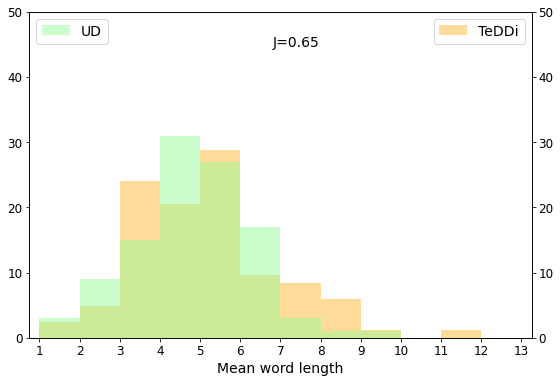

In [27]:
draw_overlap_plot(df_clc_10k_freqs_norm1, df_ud_10k_freqs_norm1, "TeDDi", "UD", clc_10k_freqs_norm1, ud_10k_freqs_norm1)

Jaccard's schore between 100LC and UD:

In [28]:
print("Jaccard's index (no scaling)", jaccard_index(ud_10k_freqs,clc_10k_freqs)[0])
print("Jaccard's index (scaling1)", jaccard_index(ud_10k_freqs_norm1,clc_10k_freqs_norm1)[0])

Jaccard's index (no scaling) 0.6198347107438017
Jaccard's index (scaling1) 0.6495756106010742




---


**100 BIBLE CORPUS**

In [29]:
 #bins
bibles_10k_freqs=get_dict(init,final,step,bibles_10k)[1]
bibles_10k_regions=get_dict(init,final,step,bibles_10k)[0]
df_bibles_10k_freqs=pd.DataFrame.from_dict(bibles_10k_freqs, orient='index')
#normalizing1:
bibles_10k_freqs_norm1, clc_10k_freqs_norm1=scaler1(bibles_10k_freqs,clc_10k_freqs)
df_clc_10k_freqs_norm1=pd.DataFrame.from_dict(clc_10k_freqs_norm1, orient='index')
df_bibles_10k_freqs_norm1=pd.DataFrame.from_dict(bibles_10k_freqs_norm1, orient='index')

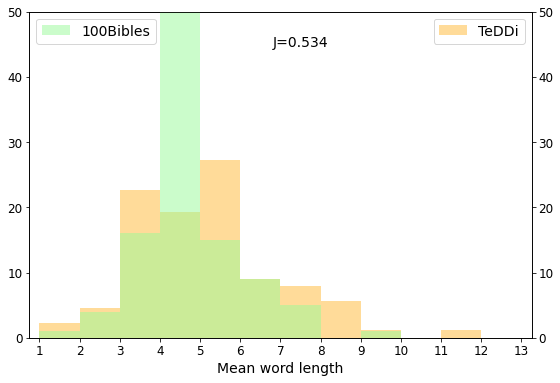

In [30]:
draw_overlap_plot(df_clc_10k_freqs_norm1, df_bibles_10k_freqs_norm1, "TeDDi", "100Bibles",clc_10k_freqs_norm1, bibles_10k_freqs_norm1)

Jaccard score between 100 Bible corpus and 100LC :

In [31]:
print("Jaccard's index (no scaling)", jaccard_index(bibles_10k_freqs,clc_10k_freqs)[0])
print("Jaccard's index (scaling1)", jaccard_index(bibles_10k_freqs_norm1,clc_10k_freqs_norm1)[0])

Jaccard's index (no scaling) 0.5447154471544715
Jaccard's index (scaling1) 0.5336973212762327




---


**XCOPA**


In [32]:
 #bins
xcopa_10k_freqs=get_dict(init,final,step,xcopa_10k)[1]
xcopa_10k_regions=get_dict(init,final,step,xcopa_10k)[0]
df_xcopa_10k_freqs=pd.DataFrame.from_dict(xcopa_10k_freqs, orient='index')
#normalizing1:
xcopa_10k_freqs_norm1, clc_10k_freqs_norm1=scaler1(xcopa_10k_freqs,clc_10k_freqs)
df_clc_10k_freqs_norm1=pd.DataFrame.from_dict(clc_10k_freqs_norm1, orient='index')
df_xcopa_10k_freqs_norm1=pd.DataFrame.from_dict(xcopa_10k_freqs_norm1, orient='index')

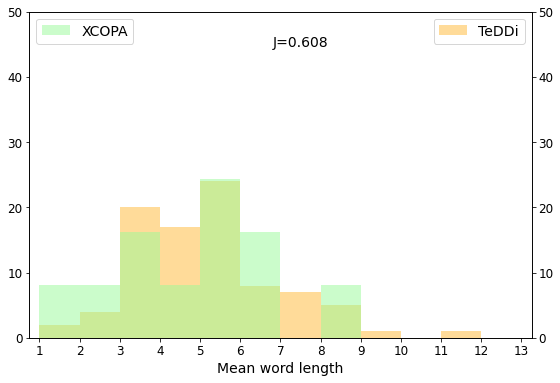

In [33]:
draw_overlap_plot(df_clc_10k_freqs_norm1, df_xcopa_10k_freqs_norm1, "TeDDi", "XCOPA", clc_10k_freqs_norm1, xcopa_10k_freqs_norm1)

Jaccard score between Xcopa corpus and 100LC:

In [34]:
print("Jaccard's index (no scaling)", jaccard_index(xcopa_10k_freqs,clc_10k_freqs)[0])
print("Jaccard's index (scaling1)", jaccard_index(xcopa_10k_freqs_norm1,clc_10k_freqs_norm1)[0])

Jaccard's index (no scaling) 0.12359550561797752
Jaccard's index (scaling1) 0.6075533661740559




---


**TyDiQA**

In [35]:
 #bins
tydiqa_10k_freqs=get_dict(init,final,step,tydiqa_10k)[1]
tydiqa_10k_regions=get_dict(init,final,step,tydiqa_10k)[0]
df_tydiqa_10k_freqs=pd.DataFrame.from_dict(tydiqa_10k_freqs, orient='index')
#normalizing1:
tydiqa_10k_freqs_norm1, clc_10k_freqs_norm1=scaler1(tydiqa_10k_freqs,clc_10k_freqs)
df_clc_10k_freqs_norm1=pd.DataFrame.from_dict(clc_10k_freqs_norm1, orient='index')
df_tydiqa_10k_freqs_norm1=pd.DataFrame.from_dict(tydiqa_10k_freqs_norm1, orient='index')

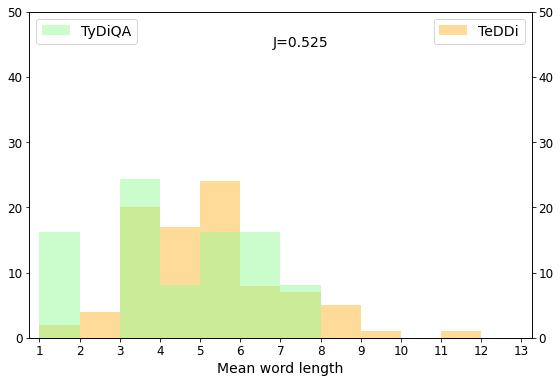

In [36]:
draw_overlap_plot(df_clc_10k_freqs_norm1, df_tydiqa_10k_freqs_norm1, "TeDDi", "TyDiQA", clc_10k_freqs_norm1, tydiqa_10k_freqs_norm1)

Jaccard's score between 100LC and TydiQA

In [37]:
print("Jaccard's index (no scaling)", jaccard_index(tydiqa_10k_freqs,clc_10k_freqs)[0])
print("Jaccard's index (scaling1)", jaccard_index(tydiqa_10k_freqs_norm1,clc_10k_freqs_norm1)[0])

Jaccard's index (no scaling) 0.12359550561797752
Jaccard's index (scaling1) 0.5249221183800623




---
**XQUAD**


In [38]:
 #bins
xquad_10k_freqs=get_dict(init,final,step,xquad_10k)[1]
xquad_10k_regions=get_dict(init,final,step,xquad_10k)[0]
df_xquad_10k_freqs=pd.DataFrame.from_dict(xquad_10k_freqs, orient='index')
#normalizing1:
xquad_10k_freqs_norm1, clc_10k_freqs_norm1=scaler1(xquad_10k_freqs,clc_10k_freqs)
df_clc_10k_freqs_norm1=pd.DataFrame.from_dict(clc_10k_freqs_norm1, orient='index')
df_xquad_10k_freqs_norm1=pd.DataFrame.from_dict(xquad_10k_freqs_norm1, orient='index')

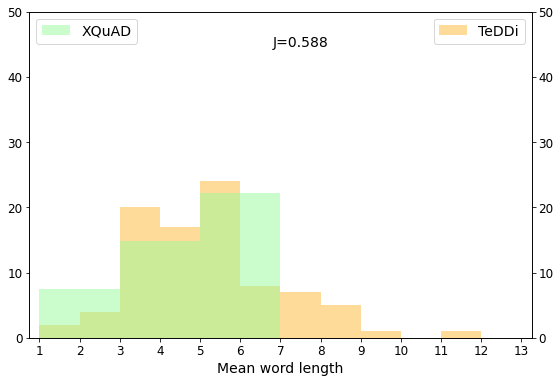

In [39]:
draw_overlap_plot(df_clc_10k_freqs_norm1, df_xquad_10k_freqs_norm1, "TeDDi", "XQuAD", clc_10k_freqs_norm1, xquad_10k_freqs_norm1)

Jaccard's score between 100LC and Xquad

In [40]:
print("Jaccard's index (no scaling)", jaccard_index(xquad_10k_freqs,clc_10k_freqs)[0])
print("Jaccard's index (scaling1)", jaccard_index(xquad_10k_freqs_norm1,clc_10k_freqs_norm1)[0])

Jaccard's index (no scaling) 0.1348314606741573
Jaccard's index (scaling1) 0.5881040892193309




---
**XNLI**


In [41]:
 #bins
xnli_10k_freqs=get_dict(init,final,step,xnli_10k)[1]
xnli_10k_regions=get_dict(init,final,step,xnli_10k)[0]
df_xnli_10k_freqs=pd.DataFrame.from_dict(xnli_10k_freqs, orient='index')
#normalizing1:
xnli_10k_freqs_norm1, clc_10k_freqs_norm1=scaler1(xnli_10k_freqs,clc_10k_freqs)
df_clc_10k_freqs_norm1=pd.DataFrame.from_dict(clc_10k_freqs_norm1, orient='index')
df_xnli_10k_freqs_norm1=pd.DataFrame.from_dict(xnli_10k_freqs_norm1, orient='index')

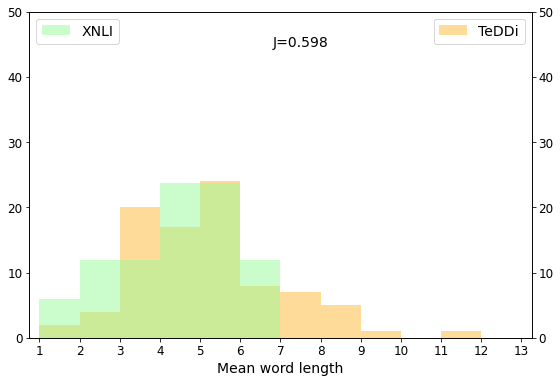

In [42]:
draw_overlap_plot(df_clc_10k_freqs_norm1, df_xnli_10k_freqs_norm1, "TeDDi", "XNLI", clc_10k_freqs_norm1, xnli_10k_freqs_norm1)

Jaccard's score between 100LC and XNLI

In [43]:
print("Jaccard's index (no scaling)", jaccard_index(xnli_10k_freqs,clc_10k_freqs)[0])
print("Jaccard's index (scaling1)", jaccard_index(xnli_10k_freqs_norm1,clc_10k_freqs_norm1)[0])

Jaccard's index (no scaling) 0.16853932584269662
Jaccard's index (scaling1) 0.5978456014362656




---
**XGLUE**


In [44]:
 #bins
xglue_10k_freqs=get_dict(init,final,step,xglue_10k)[1]
xglue_10k_regions=get_dict(init,final,step,xglue_10k)[0]
df_xglue_10k_freqs=pd.DataFrame.from_dict(xglue_10k_freqs, orient='index')
#normalizing1:
xglue_10k_freqs_norm1, clc_10k_freqs_norm1=scaler1(xglue_10k_freqs,clc_10k_freqs)
df_clc_10k_freqs_norm1=pd.DataFrame.from_dict(clc_10k_freqs_norm1, orient='index')
df_xglue_10k_freqs_norm1=pd.DataFrame.from_dict(xglue_10k_freqs_norm1, orient='index')

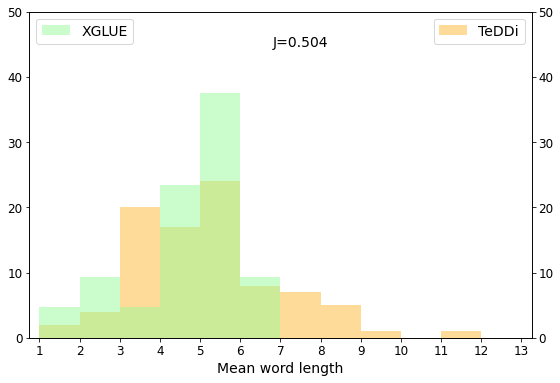

In [45]:
draw_overlap_plot(df_clc_10k_freqs_norm1, df_xglue_10k_freqs_norm1, "TeDDi", "XGLUE", clc_10k_freqs_norm1, xglue_10k_freqs_norm1)

Jaccard's score between 100LC and Xglue:

In [46]:
print("Jaccard's index (no scaling)", jaccard_index(xglue_10k_freqs,clc_10k_freqs)[0])
print("Jaccard's index (scaling1)", jaccard_index(xglue_10k_freqs_norm1,clc_10k_freqs_norm1)[0])

Jaccard's index (no scaling) 0.21348314606741572
Jaccard's index (scaling1) 0.5044483985765125




---
**XTREME**



In [47]:
 #bins
xtreme_10k_freqs=get_dict(init,final,step,xtreme_10k)[1]
xtreme_10k_regions=get_dict(init,final,step,xtreme_10k)[0]
df_xtreme_10k_freqs=pd.DataFrame.from_dict(xtreme_10k_freqs, orient='index')
#normalizing1:
xtreme_10k_freqs_norm1, clc_10k_freqs_norm1=scaler1(xtreme_10k_freqs,clc_10k_freqs)
df_clc_10k_freqs_norm1=pd.DataFrame.from_dict(clc_10k_freqs_norm1, orient='index')
df_xtreme_10k_freqs_norm1=pd.DataFrame.from_dict(xtreme_10k_freqs_norm1, orient='index')

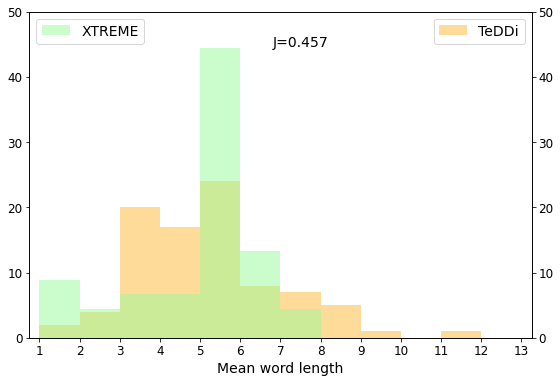

In [48]:
draw_overlap_plot(df_clc_10k_freqs_norm1, df_xtreme_10k_freqs_norm1, "TeDDi", "XTREME", clc_10k_freqs_norm1, xtreme_10k_freqs_norm1)

Jaccard's score between 100LC and XTREME:

In [49]:
print("Jaccard's index (no scaling)", jaccard_index(xtreme_10k_freqs,clc_10k_freqs)[0])
print("Jaccard's index (scaling1)", jaccard_index(xtreme_10k_freqs_norm1,clc_10k_freqs_norm1)[0])

Jaccard's index (no scaling) 0.4175824175824176
Jaccard's index (scaling1) 0.4566284779050737




---
**Mbert (wiki data)**


In [51]:
 #bins
mbertwiki_10k_freqs=get_dict(init,final,step,mbertwiki_10k)[1]
mbertwiki_10k_regions=get_dict(init,final,step,mbertwiki_10k)[0]
df_mbertwiki_10k_freqs=pd.DataFrame.from_dict(mbertwiki_10k_freqs, orient='index')
#normalizing1:
mbertwiki_10k_freqs_norm1, clc_10k_freqs_norm1=scaler1(mbertwiki_10k_freqs,clc_10k_freqs)
df_clc_10k_freqs_norm1=pd.DataFrame.from_dict(clc_10k_freqs_norm1, orient='index')
df_mbertwiki_10k_freqs_norm1=pd.DataFrame.from_dict(mbertwiki_10k_freqs_norm1, orient='index')

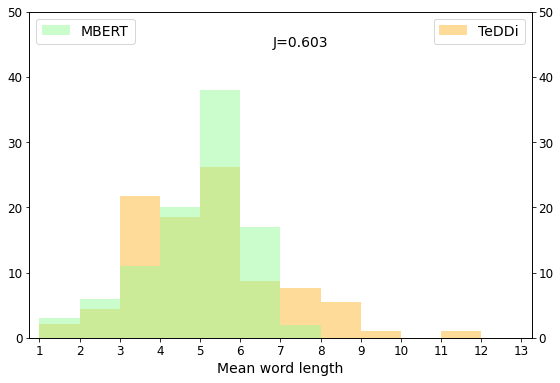

In [52]:
draw_overlap_plot(df_clc_10k_freqs_norm1, df_mbertwiki_10k_freqs_norm1, "TeDDi", "MBERT", clc_10k_freqs_norm1, mbertwiki_10k_freqs_norm1)

Jaccard's score between 100LC and XTREME:

In [53]:
print("Jaccard's index (no scaling)", jaccard_index(mbertwiki_10k_freqs,clc_10k_freqs)[0])
print("Jaccard's index (scaling1)", jaccard_index(mbertwiki_10k_freqs_norm1,clc_10k_freqs_norm1)[0])

Jaccard's index (no scaling) 0.576271186440678
Jaccard's index (scaling1) 0.6025617226656766
